In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller

In [20]:
monthly_data['APMC'].unique()

array(['Yeotmal', 'Yeola', 'Washim', 'Varud-Rajura Bazar', 'Vai', 'Vaduj',
       'Vadgaon Peth', 'Umarkhed-Danki', 'Umarkhed', 'Umarga', 'Umared',
       'Udgir', 'Tuljapur', 'Telhara', 'Tasgaon', 'Solapur', 'Sinner',
       'Shrirampur', 'Shirur', 'Shirpur', 'Shevgaon-Bodhegaon',
       'Shevgaon', 'Shegaon', 'Shahapur', 'Shahada', 'Savner', 'Satara',
       'Sangola', 'Sangamner', 'Sangali', 'Sailu', 'Roha', 'Risod',
       'Raver', 'Ratanagari', 'Ramtek', 'Rahuri-Vambori', 'Rahata',
       'Pune-Pimpri', 'Pune-Manjri', 'Pune', 'Pimpalgaon Basawant', 'Pen',
       'Pavani', 'Patur', 'Pathardi', 'Patan', 'Partur', 'Parli-Vaijnath',
       'Parbhani', 'Pandharpur', 'Nira', 'Newasa', 'Ner Parasopant',
       'Nandurbar', 'Nandura', 'Nanded', 'Nagpur', 'Nagbhid',
       'Murtizapur', 'Murbad', 'Mumbai', 'Mul', 'Morshi', 'Mohol',
       'Manora', 'Manmad', 'Mangrulpeer', 'Mangaon(Bhadav)',
       'Mangalwedha', 'Mandhal', 'Manchar', 'Malkapur', 'Malegaon',
       'Majalgaon', 'Lonar', 'L

In [2]:
monthly_data = pd.read_csv('Seasonality_Type_Detected_Data.csv')

temp_df= monthly_data.groupby(['APMC','commodity','Seasonality_Type']).size().reset_index().rename(columns={0:'Frequency'})
temp_df.head()

,APMC,commodity,Seasonality_Type,Frequency
0,Aamgaon,paddy-unhusked,Additive,27
1,Akhadabalapur,soybean,Additive,27
2,Akluj,bitter gourd,Additive,27
3,Akluj,brinjal,Multiplicative,26
4,Akluj,cabbage,Additive,27


In [5]:
monthly_data.head()

,APMC,commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,Seasonality_Type
0,Yeotmal,soybean,2015,April,12384,3311,3739,3527.0,2015-04-01,Yewatmal,Multiplicative
1,Yeotmal,soybean,2016,April,20978,3661,4045,3857.0,2016-04-01,Yewatmal,Multiplicative
2,Yeotmal,soybean,2015,August,5958,3029,3321,3240.0,2015-08-01,Yewatmal,Multiplicative
3,Yeotmal,soybean,2016,August,3539,3089,3438,3282.0,2016-08-01,Yewatmal,Multiplicative
4,Yeotmal,soybean,2014,December,18921,3014,3300,3163.0,2014-12-01,Yewatmal,Multiplicative


In [32]:
resultant_df = pd.DataFrame()
monthly_data['Deseasonalized_Price'] = np.nan
for i,row in temp_df.iterrows():
    dframe = monthly_data[(monthly_data['APMC']==row.APMC)&(monthly_data['commodity']==row.commodity)]
    model=row.Seasonality_Type

    
    df = dframe[['date','modal_price']]
    df['date'] = pd.to_datetime(df['date'])
    dframe['date'] = pd.to_datetime(dframe['date'])
    df = df.sort_values(by=['date'])
    dframe = dframe.sort_values(by=['date'])
    df = df.set_index('date')
    
    
    if model == 'Additive':
        dec = seasonal_decompose(df.values,model='additive',freq=3)
        ses = list(dec.seasonal)
        dframe.reset_index(inplace=True,drop=True)
        for i in range(len(df)):
            dframe.loc[i,'Deseasonalized_Price'] = int((dframe.loc[i,'modal_price'])-ses[i])
            
    else:
        dec = seasonal_decompose(df.values,model='multiplicative',freq=3)
        ses = list(dec.seasonal)
        dframe.reset_index(inplace=True,drop=True)
        for i in range(len(df)):
            dframe.loc[i,'Deseasonalized_Price'] = int((dframe.loc[i,'modal_price'])-ses[i])
    output_df = Deseasonalize_Modal_Price(dframe,row.Seasonality_Type)
    resultant_df = pd.concat([output_df,resultant_df])

In [33]:
resultant_df.head()


,APMC,commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,Seasonality_Type,Deseasonalized_Price
0,Yeotmal,soybean,2014,September,2162,3063,3379,3225.0,2014-09-01,Yewatmal,Multiplicative,3224.0
1,Yeotmal,soybean,2014,October,10548,2906,3229,3070.0,2014-10-01,Yewatmal,Multiplicative,3068.0
2,Yeotmal,soybean,2014,November,29381,3000,3327,3162.0,2014-11-01,Yewatmal,Multiplicative,3160.0
3,Yeotmal,soybean,2014,December,18921,3014,3300,3163.0,2014-12-01,Yewatmal,Multiplicative,3162.0
4,Yeotmal,soybean,2015,January,19595,3009,3340,3176.0,2015-01-01,Yewatmal,Multiplicative,3174.0


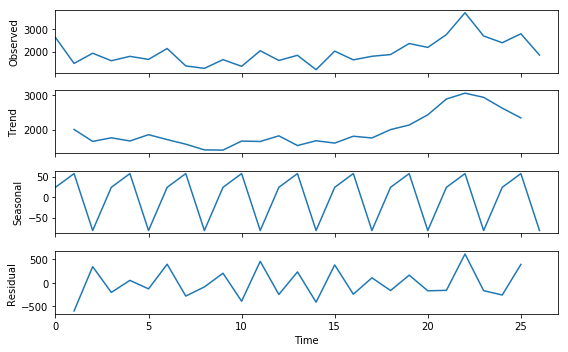

In [61]:
test_df1 = resultant_df[(resultant_df['APMC']=='Mumbai')&(resultant_df['commodity']=='small gourd')]
plot_df = test_df1[['date','modal_price']]
plot_df.set_index('date',inplace=True)
decompose = seasonal_decompose(plot_df.values,model='additive',freq=3)
decompose.plot()
plt.savefig('Seasonality1.png',dpi=200)

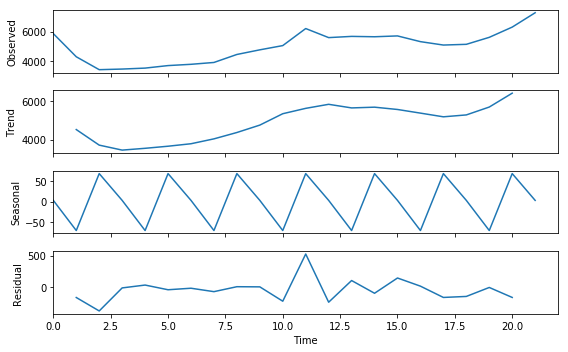

In [35]:
test_df2 = resultant_df[(resultant_df['APMC']=='Pune')&(resultant_df['commodity']=='gram')]
plot_df1 = test_df2[['date','modal_price']]
plot_df1.set_index('date',inplace=True)
decompose = seasonal_decompose(plot_df1.values,model='additive',freq=3)
decompose.plot()
plt.savefig('Seasonality12.png',dpi=200)

In [51]:
resultant_df.head()

,APMC,commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,Seasonality_Type,Deseasonalized_Price
0,Yeotmal,soybean,2014,September,2162,3063,3379,3225.0,2014-09-01,Yewatmal,Multiplicative,3224.0
1,Yeotmal,soybean,2014,October,10548,2906,3229,3070.0,2014-10-01,Yewatmal,Multiplicative,3068.0
2,Yeotmal,soybean,2014,November,29381,3000,3327,3162.0,2014-11-01,Yewatmal,Multiplicative,3160.0
3,Yeotmal,soybean,2014,December,18921,3014,3300,3163.0,2014-12-01,Yewatmal,Multiplicative,3162.0
4,Yeotmal,soybean,2015,January,19595,3009,3340,3176.0,2015-01-01,Yewatmal,Multiplicative,3174.0


In [44]:
resultant_df['commodity'].value_counts()

wheat(husked)            1875
gram                     1776
sorgum(jawar)            1693
soybean                  1578
maize                    1110
pigeon pea (tur)         1026
bajri                    1014
brinjal                   607
green chilli              522
tomato                    519
ladies finger             505
cucumber                  451
bitter gourd              448
cabbage                   438
paddy-unhusked            423
flower                    373
capsicum                  371
green gram                340
black gram                329
ginger (fresh)            317
potato                    305
bottle gourd              292
pomegranate               270
cluster bean              263
rice(paddy-hus)           242
garlic                    237
chillies(red)             208
ridge gourd               172
lemon                     162
ground nut pods (dry)     157
                         ... 
arvi                       27
sugar                      27
cardamom  

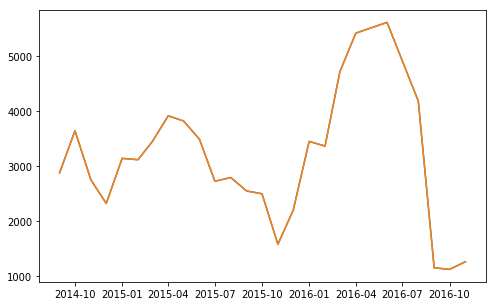

In [58]:
X = resultant_df[(resultant_df['APMC']=='Mumbai')&(resultant_df['commodity']=='green chilli')]
plt.plot(X['date'],X['modal_price'])
plt.plot(X['date'],X['Deseasonalized_Price'])
rcParams['figure.figsize'] = 8, 5
plt.savefig('De-Seasonality1.png',dpi=200)

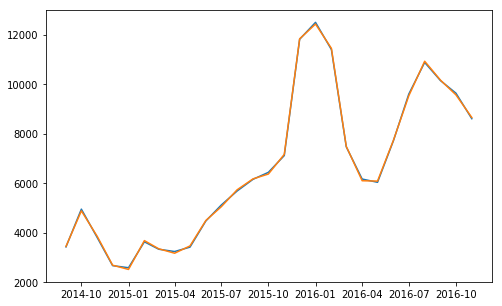

In [47]:
Y = resultant_df[(resultant_df['APMC']=='Akluj')&(resultant_df['commodity']=='garlic')]
plt.plot(Y['date'],Y['modal_price'])
plt.plot(Y['date'],Y['Deseasonalized_Price'])
plt.savefig('De-Seasonality2.png',dpi=200)

In [59]:
resultant_df.to_csv("Deseasonalized_Mandi_Prices.csv",index=False)
